### FUEL QUALITY ANALYSIS

#### Import important libraries

In [1]:
import numpy as np  # Linear algebra
import pandas as pd # data processing

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc('figure',figsize=(12,4)) # Set the size of each plot

### Load the dataset

In [2]:
fuel_df = pd.read_csv('hamoye_fuel_data.csv')

### Dataset Description

In [3]:
print('The dataset contains {} rows and {} columns'.format(fuel_df.shape[0],fuel_df.shape[1]))


The dataset contains 29523 rows and 12 columns


In [4]:
# Let us have a feel of the dataset by viewing the first five rows
fuel_df.head()

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
0,0,f1_fuel_1994_12_1_0_7,1,1994,rockport,coal,ton,5377489.0,16.590,18.59,18.53,1.121
1,1,f1_fuel_1994_12_1_0_10,1,1994,rockport total plant,coal,ton,10486945.0,16.592,18.58,18.53,1.120
2,2,f1_fuel_1994_12_2_0_1,2,1994,gorgas,coal,ton,2978683.0,24.130,39.72,38.12,1.650
3,3,f1_fuel_1994_12_2_0_7,2,1994,barry,coal,ton,3739484.0,23.950,47.21,45.99,1.970
4,4,f1_fuel_1994_12_2_0_10,2,1994,chickasaw,gas,mcf,40533.0,1.000,2.77,2.77,2.570


In [5]:
# Let us have a feel of the dataset by viewing random samples
fuel_df.sample(10)

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
18960,18960,f1_fuel_2009_12_36_0_1,36,2009,east river 6&7,oil,bbl,63017.0,6.286140,0.000,0.000,10.760
3749,3749,f1_fuel_1997_12_69_1_9,69,1997,sutherland,gas,mcf,568160.0,0.999000,3.520,3.520,3.520
24785,24785,f1_fuel_2014_12_144_2_14,144,2014,vermillion,gas,mcf,185895.0,1.000000,5.821,5.821,5.662
23660,23660,f1_fuel_2013_12_44_0_4,44,2013,belle river dte-81%,coal,ton,3471606.0,18.338000,39.442,43.023,2.150
4661,4661,f1_fuel_1998_12_10_0_4,10,1998,brandon shores,coal,ton,3320786.0,25.354000,36.380,35.520,1.430
1085,1085,f1_fuel_1994_12_22_0_8,22,1994,dolet hill,coal,ton,1802038.0,13.778000,19.430,19.450,1.410
19719,19719,f1_fuel_2010_12_31_0_5,31,2010,picway,oil,bbl,1382.0,5.758494,89.199,90.340,15.490
4941,4941,f1_fuel_1998_12_120_0_10,120,1998,high bridge,coal,ton,928902.0,17.740000,17.800,16.670,1.000
11842,11842,f1_fuel_2003_12_145_1_7,145,2003,valmont 5,coal,ton,614964.0,22.750000,25.843,25.843,1.136
20439,20439,f1_fuel_2010_12_194_6_10,194,2010,sheboygan falls,gas,mcf,330387.0,1.005686,11.770,11.770,11.701


In [6]:
# View the datatypes of each feature
fuel_df.dtypes

Unnamed: 0                        int64
record_id                        object
utility_id_ferc1                  int64
report_year                       int64
plant_name_ferc1                 object
fuel_type_code_pudl              object
fuel_unit                        object
fuel_qty_burned                 float64
fuel_mmbtu_per_unit             float64
fuel_cost_per_unit_burned       float64
fuel_cost_per_unit_delivered    float64
fuel_cost_per_mmbtu             float64
dtype: object

In [7]:
# Let us get the numerical and categorical features as list
categorical_features = fuel_df.select_dtypes(include='object').columns.to_list()
numerical_features = fuel_df.select_dtypes(include='number').columns.to_list()

print("Categorical Features: ",categorical_features)
print("Numerical Features: ",numerical_features)

Categorical Features:  ['record_id', 'plant_name_ferc1', 'fuel_type_code_pudl', 'fuel_unit']
Numerical Features:  ['Unnamed: 0', 'utility_id_ferc1', 'report_year', 'fuel_qty_burned', 'fuel_mmbtu_per_unit', 'fuel_cost_per_unit_burned', 'fuel_cost_per_unit_delivered', 'fuel_cost_per_mmbtu']


### Do we have missing values?

In [26]:
# Check for missing values
fuel_df.isna().sum()

Unnamed: 0                        0
record_id                         0
utility_id_ferc1                  0
report_year                       0
plant_name_ferc1                  0
fuel_type_code_pudl               0
fuel_unit                       180
fuel_qty_burned                   0
fuel_mmbtu_per_unit               0
fuel_cost_per_unit_burned         0
fuel_cost_per_unit_delivered      0
fuel_cost_per_mmbtu               0
dtype: int64

### We have 180 missing rows in fuel_data

### Data description using summary statistics

In [33]:
fuel_df.describe(include='all')

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
count,29523.000000,29523,29523.000000,29523.000000,29523,29523,29343,2.952300e+04,29523.000000,29523.000000,2.952300e+04,29523.000000
unique,NaN,29523,NaN,NaN,2315,6,9,NaN,NaN,NaN,NaN,NaN
top,NaN,f1_fuel_1994_12_1_0_7,NaN,NaN,big stone,gas,mcf,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,156,11486,11354,NaN,NaN,NaN,NaN,NaN
mean,14761.000000,NaN,118.601836,2005.806050,NaN,NaN,NaN,2.622119e+06,8.492111,208.649031,9.175704e+02,19.304354
std,8522.700335,NaN,74.178353,7.025483,NaN,NaN,NaN,9.118004e+06,10.600220,2854.490090,6.877593e+04,2091.540939
min,0.000000,NaN,1.000000,1994.000000,NaN,NaN,NaN,1.000000e+00,0.000001,-276.080000,-8.749370e+02,-41.501000
25%,7380.500000,NaN,55.000000,2000.000000,NaN,NaN,NaN,1.381700e+04,1.024000,5.207000,3.778500e+00,1.940000
50%,14761.000000,NaN,122.000000,2006.000000,NaN,NaN,NaN,2.533220e+05,5.762694,26.000000,1.737100e+01,4.127000
75%,22141.500000,NaN,176.000000,2012.000000,NaN,NaN,NaN,1.424034e+06,17.006000,47.113000,4.213700e+01,7.745000


Observations
* There is a total of 29523 rows
* There is no duplicate in the dataset since the record_id column contains 29523 unique items
* We have 2315 unique plants.
* There seems to be an outlier in fuel_cost_per_unit_burned, fuel_cost_per_unit_delivered &
          fuel_cost_per_mmbtu because there is a huge difference between the max value and where
          the 75% of the data lies

Let us explore the data further to find more insight

### 2. Univariate Analysis

#### Categorical Features

In [34]:
# Let us print the categorical features we saved earlier on
print(categorical_features)

['record_id', 'plant_name_ferc1', 'fuel_type_code_pudl', 'fuel_unit']


### Plot of Plant Name

In [36]:
# Showing the value count of each element in plant name
fuel_df.plant_name_ferc1.value_counts()

big stone            156
four corners         151
riverside            133
coyote               121
louisa               119
                    ... 
flint creek 0007       1
pirkey 0008            1
bruce mansfield 3      1
bpt harbor             1
tucumcari              1
Name: plant_name_ferc1, Length: 2315, dtype: int64

The plot below shows the first 15 companies based on locations with 'big stone' and 'four corners'
being found in 156 and 151 locations repectively.
Also, there is significant imbalance in the count of plant name.

#### NB: The number of companies is not proportional to the quantity of fuel consumed in that company

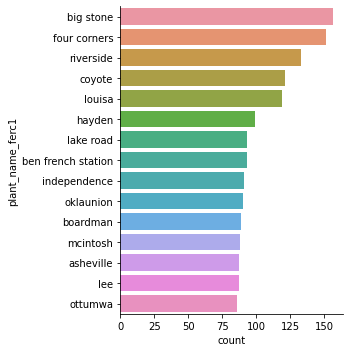

In [38]:
sns.catplot(y='plant_name_ferc1', data = fuel_df,kind='count', 
            order=fuel_df.plant_name_ferc1.value_counts().nlargest(15).index)

### Plot of fuel unit

In [39]:
# Showing the value count of each element in fuel unit
fuel_df.fuel_unit.value_counts()

mcf       11354
ton        8958
bbl        7998
gramsU      464
mmbtu       180
kgU         110
mwhth       100
mwdth        95
gal          84
Name: fuel_unit, dtype: int64

It is obvious that the commonly used fuel unit is mcf followed by ton

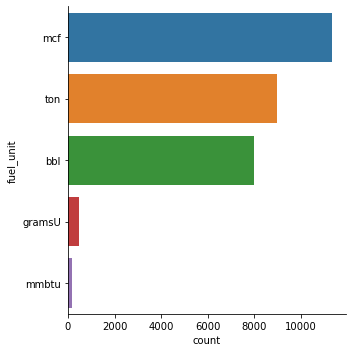

In [40]:
# Plot of fuel unit
sns.catplot(y='fuel_unit', data = fuel_df.dropna(),kind='count', 
            order=fuel_df.fuel_unit.value_counts().nlargest(5).index)

### Plot by fuel type

In [41]:
# Showing the value counts of each item in fuel_type_code_pudl
fuel_df.fuel_type_code_pudl.value_counts()

gas        11486
coal        8547
oil         8064
nuclear      818
waste        441
other        167
Name: fuel_type_code_pudl, dtype: int64

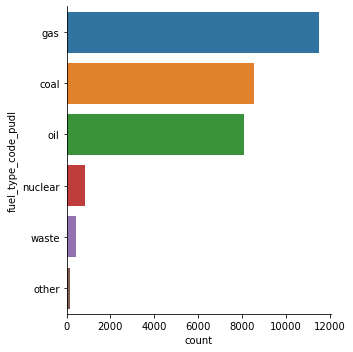

In [42]:
# Plotting the fuel_type_code_pudl
sns.catplot(y='fuel_type_code_pudl', data=fuel_df, kind='count',
           order=fuel_df.fuel_type_code_pudl.value_counts().index)

Gas is the most common fuel type and mcf is the most common fuel unit.
Research has it that gas is mostly measured in mcf. There might be a relation between fuel type and fuel unit.
We will explore that in bivariant analysis

### Numerical Features

In [44]:
# Let us print the numerical features we saved earlier on
numerical_features

['Unnamed: 0',
 'utility_id_ferc1',
 'report_year',
 'fuel_qty_burned',
 'fuel_mmbtu_per_unit',
 'fuel_cost_per_unit_burned',
 'fuel_cost_per_unit_delivered',
 'fuel_cost_per_mmbtu']

In our summary statistics, we identified an issue of outliers with some numerical variables.
Let us look into this by vizualizing fuel_cost_per_mmbtu feature

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fuel_cost_per_mmbtu', ylabel='Density'>

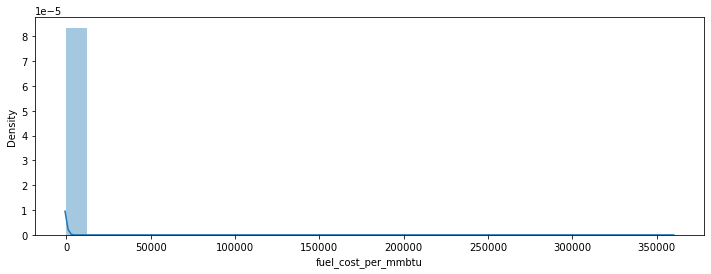

In [45]:
# Let us plot a distplot of the fuel_cost_per_mmbtu feature
sns.distplot(fuel_df.fuel_cost_per_mmbtu, bins=30)

We can see that majority of the values clusters between 0 to 2000, while there is an extension
upto the value of 350000

In [47]:
fuel_df[fuel_df.fuel_cost_per_mmbtu > 349999]

,Unnamed: 0,record_id,utility_id_ferc1,report_year,plant_name_ferc1,fuel_type_code_pudl,fuel_unit,fuel_qty_burned,fuel_mmbtu_per_unit,fuel_cost_per_unit_burned,fuel_cost_per_unit_delivered,fuel_cost_per_mmbtu
28256,28256,f1_fuel_2017_12_193_1_7,193,2017,rothschild,waste,ton,297109.0,0.000009,29.629,29.629,359278.0


In [48]:
 # Let us drop it using the row index and save the fuel_df
fuel_df.drop([28256], inplace=True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fuel_cost_per_mmbtu', ylabel='Density'>

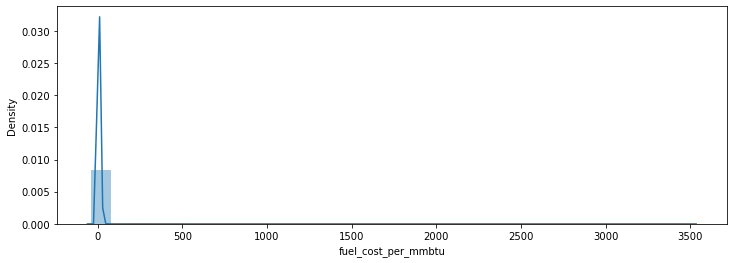

In [49]:
# Let us plot a distplot of the fuel_cost_per_mmbtu feature after removing the outlier
sns.distplot(fuel_df.fuel_cost_per_mmbtu, bins=30)

### Let us calculate the skewness of each of the numeric features

Skewness is a statistical measure that quantifies the symmetry of the distribution.
Skewness is the standardized third central moment and Kurtosis is the standardized
fourth central moment.
A distribution may be skewed in the positive direction or negative direction.
A positively skewed distribution has a long tail on the right side and negatively
    skewed distribution has a long tail on the left side.
A right tailed distribution or a positively skewed distribution has its mean greater
    than the median as the outliers present in the skewed right tail of the distribution influence the mean.
A left tailed distribution has its mean smaller than the median.

In [51]:
fuel_df.skew()

C:\Users\User\AppData\Local\Temp\ipykernel_51740\3971936937.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  fuel_df.skew()


Unnamed: 0                        0.000026
utility_id_ferc1                  0.605158
report_year                       0.006979
fuel_qty_burned                  15.851254
fuel_mmbtu_per_unit               4.135218
fuel_cost_per_unit_burned        19.787102
fuel_cost_per_unit_delivered    105.012448
fuel_cost_per_mmbtu              58.439028
dtype: float64

#### How can you interpret the skewness number?

#### If skewness is less than −1 or greater than +1, the distribution is highly skewedIf skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.If skewness is between −½ and +½, the distribution is approximately symmetric.

### 3. Multivariate Analysis

In this aspect of our exploration, we will answer some questions using the dataset
We will use pd.groupby() and some visualization to answer some important question

Let us find relation in our categorical features
We will consider the following features: ['plant_name_ferc1', 'fuel_type_code_pudl', 'fuel_unit']

### Relationship between fuel type and fuel name

In [52]:
fuel_df.groupby(['fuel_type_code_pudl','fuel_unit'])['fuel_unit'].count()

fuel_type_code_pudl  fuel_unit
coal                 bbl              1
                     mcf              5
                     mmbtu           52
                     ton           8438
gas                  bbl              2
                     mcf          11333
                     mmbtu           94
                     ton              4
nuclear              gramsU         464
                     kgU            110
                     mmbtu           34
                     mwdth           95
                     mwhth          100
oil                  bbl           7952
                     gal             81
                     mcf              7
                     ton              3
other                bbl             42
                     gal              3
                     mcf              9
                     ton             77
waste                bbl              1
                     ton            435
Name: fuel_unit, dtype: int64

Though the most common fuel unit is mcf, we have observed that each fuel type has its own
most coommon fuel unit.

Let us print them out because we will use them to fill the NA values in fuel unit column

In [53]:
fuel_df.groupby(['fuel_type_code_pudl','fuel_unit'])['fuel_unit'].count().nlargest(5)


fuel_type_code_pudl  fuel_unit
gas                  mcf          11333
coal                 ton           8438
oil                  bbl           7952
nuclear              gramsU         464
waste                ton            435
Name: fuel_unit, dtype: int64

#### NB: other has bbl as mode

In [54]:
fuel_df.groupby(['fuel_type_code_pudl'])['fuel_unit'].count()

fuel_type_code_pudl
coal        8496
gas        11433
nuclear      803
oil         8043
other        131
waste        436
Name: fuel_unit, dtype: int64

#### Let us fill the NA values in fuel unit with the mode gotten from groupby

In [56]:
fuel_df['fuel_unit'] = fuel_df.groupby(['fuel_type_code_pudl'])['fuel_unit'].transform(lambda x: x.fillna(x.mode()[0]))


In [57]:
# Check if any null values exist
fuel_df.isna().any()

Unnamed: 0                      False
record_id                       False
utility_id_ferc1                False
report_year                     False
plant_name_ferc1                False
fuel_type_code_pudl             False
fuel_unit                       False
fuel_qty_burned                 False
fuel_mmbtu_per_unit             False
fuel_cost_per_unit_burned       False
fuel_cost_per_unit_delivered    False
fuel_cost_per_mmbtu             False
dtype: bool

### Question 1

#### What is the cheapest fuel source?

In [58]:
ca = fuel_df.groupby('fuel_type_code_pudl')['fuel_cost_per_mmbtu'].sum().nlargest(6)
ca

fuel_type_code_pudl
oil        102402.57762
gas         62126.34574
other       25899.18000
coal        15275.11517
waste        3537.08200
nuclear      1404.14500
Name: fuel_cost_per_mmbtu, dtype: float64

#### Answer:
nulear is the cheapest source of fuel

Text(0.5, 0, 'Fuel Type')

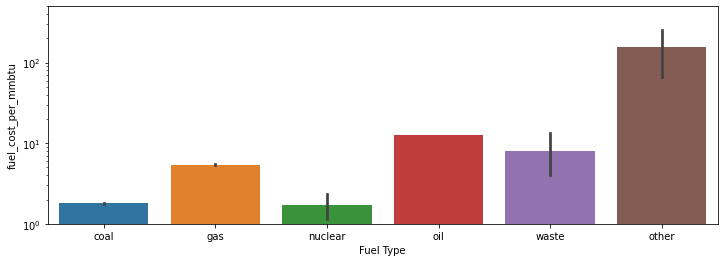

In [59]:
# Visualize the answer to question 1
b_plot = sns.barplot(data=fuel_df, x='fuel_type_code_pudl',y ='fuel_cost_per_mmbtu')
b_plot.set_yscale('log')
b_plot.set_ylim(1,500)
plt.xlabel('Fuel Type')

Although some outliers stil exist in the dataset, nuclear remains the cheapest source of fuel

### Question 2

#### How does the quantity of fuel burnt relate to the report year?


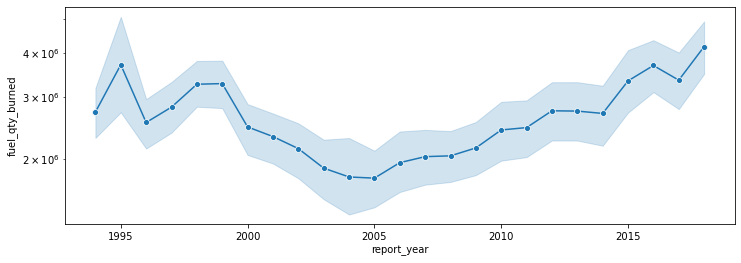

In [61]:
l_plot = sns.lineplot(data=fuel_df, x='report_year',y='fuel_qty_burned', marker='o')
l_plot.set_yscale('log')

 The quantity of fuel burnt peaked in 1995 and started pulling down. It made the lowest low
in 2005 and started spiking up.

### 2b How does the quantity of fuel burnt (per fuel type) relate to the report year?

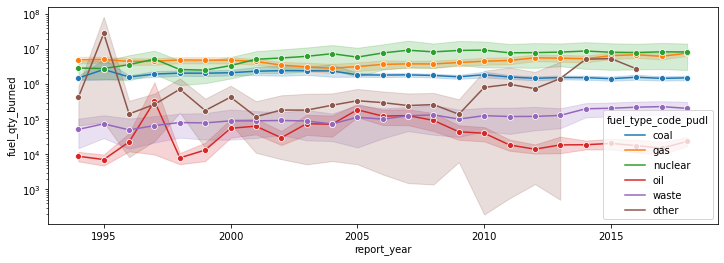

In [62]:
l_plot = sns.lineplot(data=fuel_df, x='report_year',y='fuel_qty_burned',hue='fuel_type_code_pudl',marker='o')
l_plot.set_yscale('log')

Over the years, it can be inferred that
Nuclear is the most consumed fuel type over the years followed by gas
Oil remained the least used fuel type
*The consumption in other fuel type rapidly increased as year approaches 2010 and remained
    the third most consumed fuel type in 2015



### Question 3

#### Relationship between COST and fuel type over the report years?

COST    >> per_unit_burned (Production Cost per Unit)

            
            
       >> fuel_cost_per_unit_delivered (DeliveryCost per Unit)
    
       >> fuel_cost_per_mmbtu (Consumption Cost per Unit)

### Production Cost per Unit of the various types of fuel over the years


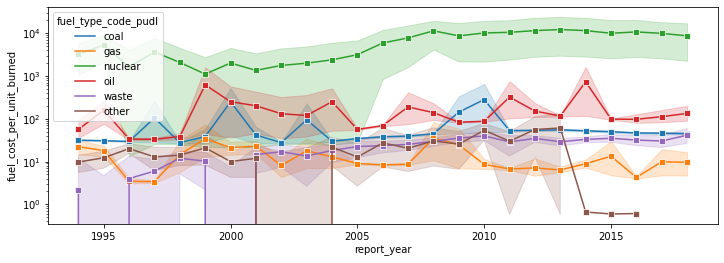

In [63]:
l_plot = sns.lineplot(data=fuel_df,x='report_year',y='fuel_cost_per_unit_burned',
             hue='fuel_type_code_pudl', marker='s')
l_plot.set_yscale('log')

#### Observations: We can observe the following

The cost of production of nuclear fuel is the highest with a very high margin slightly followed by oil.
The cost of production of gas fuel is the cheapest over the years
*There was a rpaid decrement in the cost of production of other around 2014 which made it the
    cheapest fuel type as per production cost.

### Delivery Cost per unit of the various types of fuel over the years

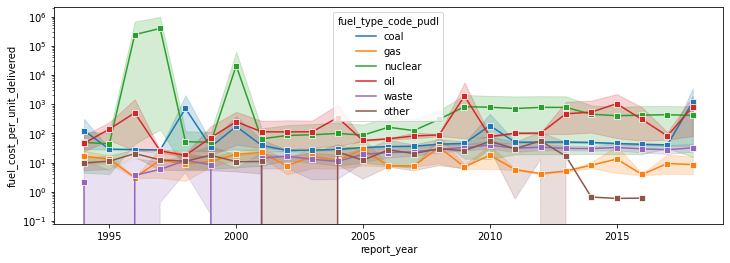

In [64]:
l_plot = sns.lineplot(data=fuel_df,x='report_year',y='fuel_cost_per_unit_delivered',
             hue='fuel_type_code_pudl', marker='s')
l_plot.set_yscale('log')
